<a href="https://colab.research.google.com/github/GaryMarmon/vim/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

plt.style.use('fivethirtyeight')

In [4]:
students = pd.read_csv('hypothetical_students.csv')
students.shape

(199, 3)

This dataset contains 199 hypothetical college freshman students with features including:
*   Ratio of Hours completed by the student
*   GPA achieved in the students first fall semester
*   High School GPA





In [5]:
students.head()

,Ratio_Completed_Classes,FIRST_FALL_GPA,GPA_HIGHSCHOOL
0,0.375000,1.100000,3.18
1,1.000000,3.223076,3.60
2,0.823529,3.925000,3.86
3,0.714286,3.400000,2.53
4,1.000000,3.880000,4.38


In [7]:
from sklearn.cluster import KMeans
ks = range(1,6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(students)
    inertias.append(model.inertia_)

Scree plot to get an idea of the proper number of clusters

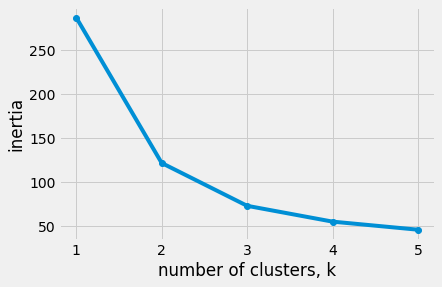

In [207]:
plt.plot(ks, inertias, '-o')
plt.xlabel("number of clusters, k")
plt.ylabel("inertia")
plt.xticks(ks)
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(students)

KMeans(n_clusters=2)

In [16]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, distortion = kmeans(students, 2)
students['cluster_labels'], distorion_list = vq(students, cluster_centers)

In [21]:
fig = px.scatter_3d(students, x='Ratio_Completed_Classes', y='FIRST_FALL_GPA', z='GPA_HIGHSCHOOL',
              color='cluster_labels')
fig.show()

In [22]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, distortion = kmeans(students, 3)
students['cluster_labels'], distorion_list = vq(students, cluster_centers)

In [23]:
fig = px.scatter_3d(students, x='Ratio_Completed_Classes', y='FIRST_FALL_GPA', z='GPA_HIGHSCHOOL',
              color='cluster_labels')
fig.show()

In [24]:
from scipy.cluster.vq import kmeans, vq
cluster_centers, distortion = kmeans(students, 4)
students['cluster_labels'], distorion_list = vq(students, cluster_centers)

In [25]:
fig = px.scatter_3d(students, x='Ratio_Completed_Classes', y='FIRST_FALL_GPA', z='GPA_HIGHSCHOOL',
              color='cluster_labels')
fig.show()

# SVM

make dataset

In [197]:
X, y = make_blobs(n_samples = 300, centers = 2, n_features = 2, random_state=7)

Plot the full dataset

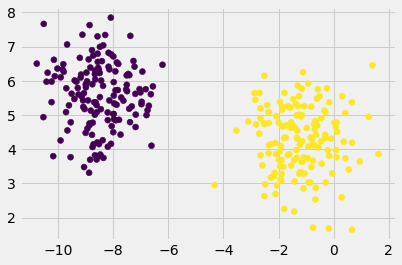

In [208]:
plt.scatter(X[:, 0], X[:, 1], c=y)

Split the data into train and test sets

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Plot the train set

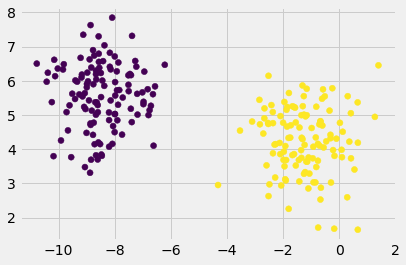

In [209]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Plot the test set

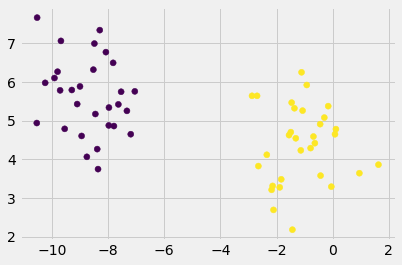

In [210]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

Classify groups using SVM

In [202]:
#initializing SVM
svc = svm.SVC(kernel="linear", C = 1)
#Training the svc
svc.fit(X_train, y_train)
#5 fold cross validation for accuracy
scores = cross_val_score(svc, X_train, y_train, cv=5)
print("Accuracy: %0.4f" % (scores.mean()))

Accuracy: 1.0000


In [203]:
#testing on unseen data
y_pred = classifier.predict(X_test)
print("Accuracy: %0.4f"% metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0000


Visualize boundries

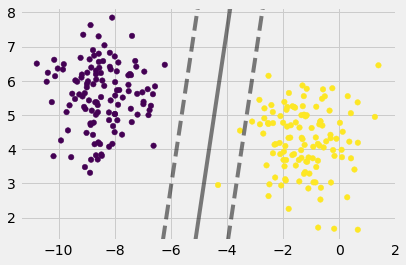

In [211]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1],
           linewidth=1, facecolors='none')